In [4]:
import numpy as np
import pandas as pd

from scipy.io.wavfile import read
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.signal import welch, convolve2d

import matplotlib.pyplot as plt

In [72]:
sr, noise1 = read('noise1.wav')
sr, noise2 = read('noise2.wav')
sr, noise3 = read('noise3.wav')

In [73]:
def plot_figures(noise):
    periodogram  = fft(noise)
    freq = fftfreq(noise.shape[0], 1/sr)
    freqs, power = welch(noise, fs=sr, nperseg=1024)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(noise)
    ax1.set_xlabel('Time (frame)')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Time domain')


    ax2.plot(freq[:len(freq)//2], 20*np.log(np.abs(periodogram[:len(periodogram)//2])))
    ax2.set_xscale('log')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Power (dB)')


    ax3.plot(freqs, 10*np.log(power))
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_xscale('log')
    ax3.set_ylabel('Power (dB)')

    return freqs, power


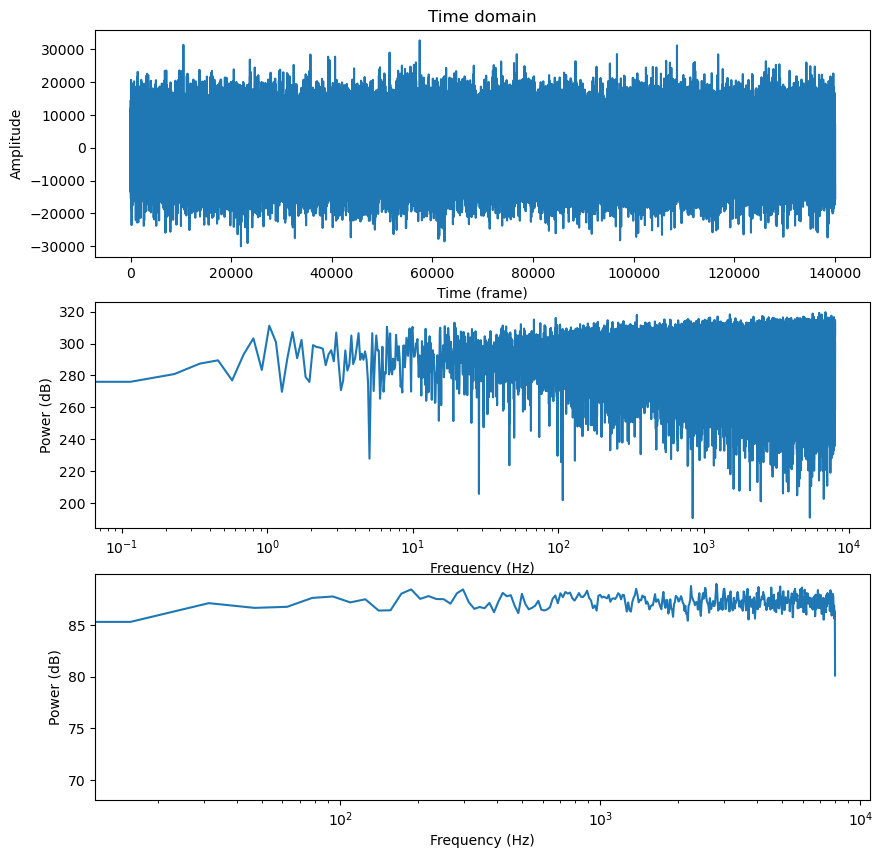

In [74]:
freqs, noise1_power = plot_figures(noise1)

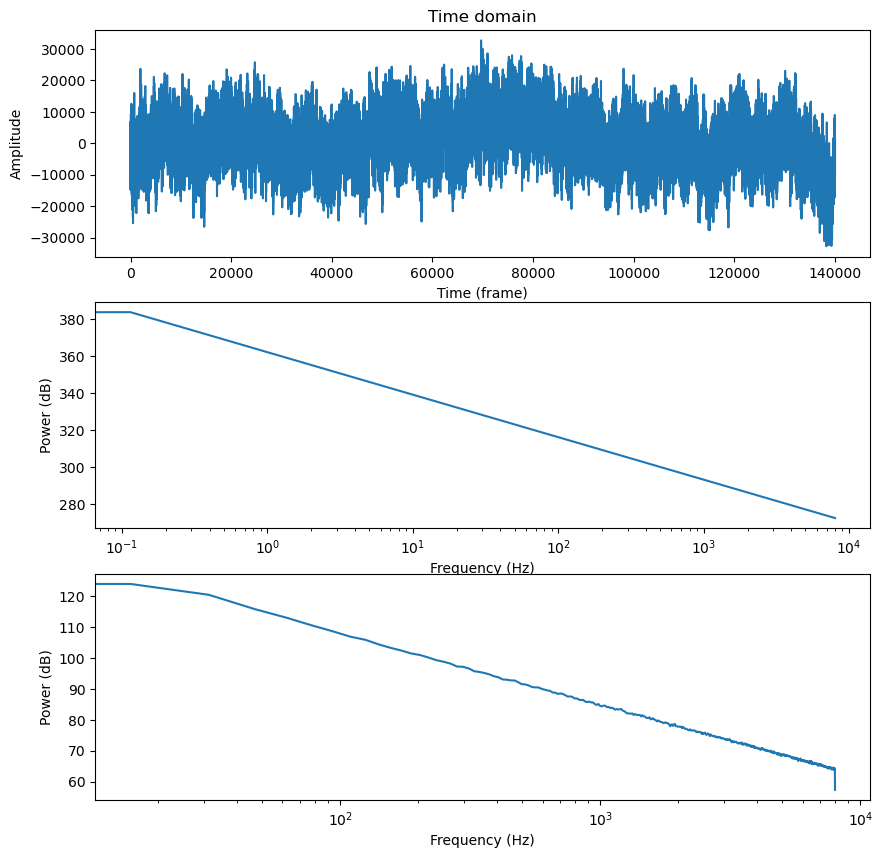

In [75]:
freqs, noise2_power = plot_figures(noise2)

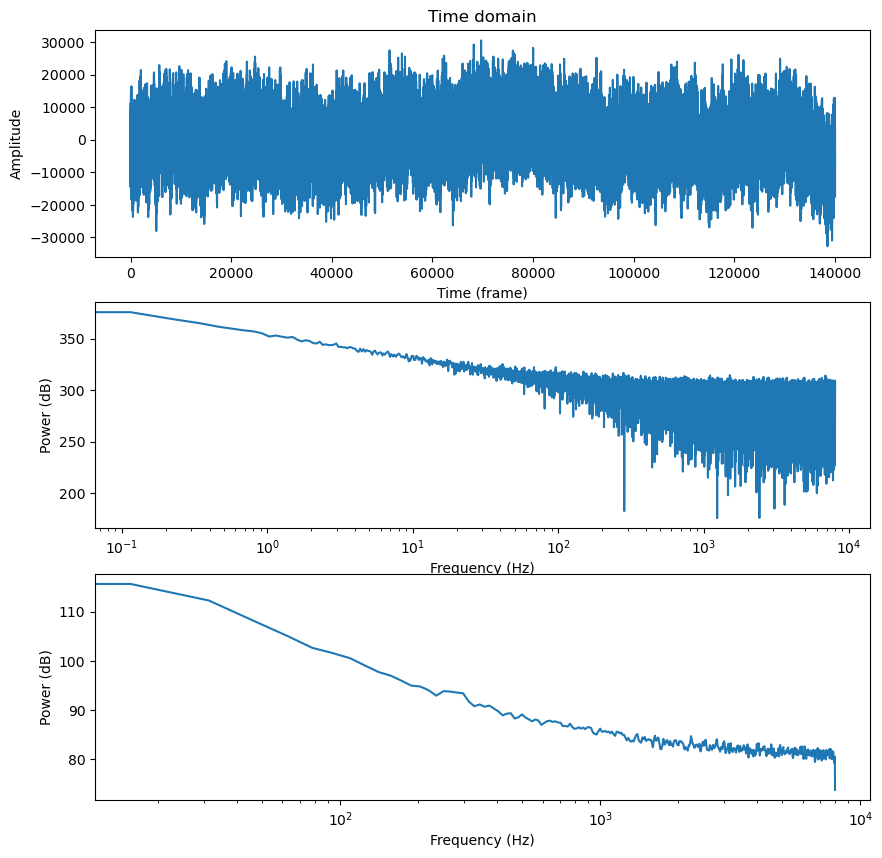

In [76]:
freqs, noise3_power = plot_figures(noise3)

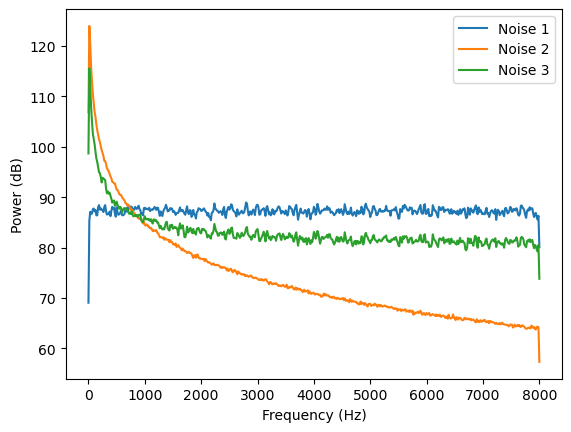

In [77]:
plt.plot(freqs, 10*np.log(noise1_power), label='Noise 1')
plt.plot(freqs, 10*np.log(noise2_power), label='Noise 2')
plt.plot(freqs, 10*np.log(noise3_power), label='Noise 3')
# plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')

plt.legend()

In [11]:
from PIL import Image

from scipy.ndimage import gaussian_filter
from numpy.fft import fft2, ifft2, fftshift, ifftshift

In [12]:
# Read image
img = Image.open('barbara.jpg')

# Take only the first channel
img_array = np.asanyarray(img)[:,:,0]

N = img_array.shape[0]*img_array.shape[1]

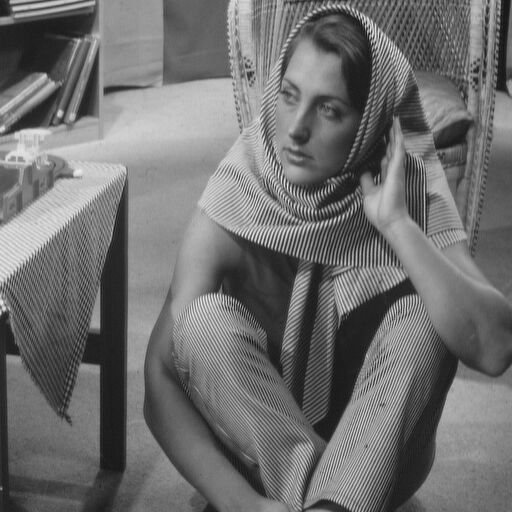

In [13]:
img

In [14]:
img_power = np.sum(img_array**2)

def get_sigma_of_noise(SNR): 
    sigma = np.sqrt(img_power / (img_array.shape[0] * img_array.shape[1]) * np.exp(-SNR/10))
    return sigma

In [44]:
sigma = get_sigma_of_noise(-20)
noise = np.random.normal(0, sigma, img_array.shape)
noisy_img = img_array + noise

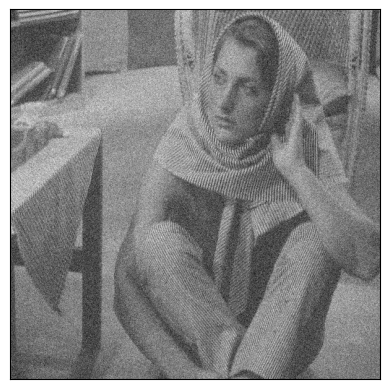

In [45]:
plt.imshow(noisy_img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
P = 1/N * ( abs(fft2(img_array))**2 )

In [47]:
h_hat = P / (P + sigma**2)

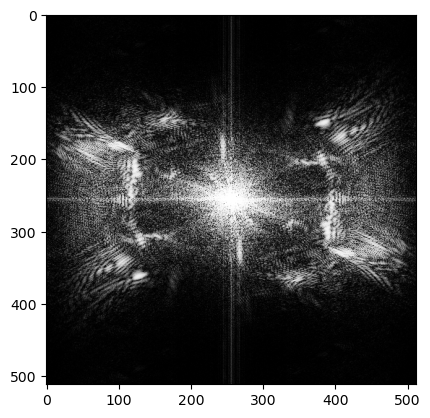

In [48]:
plt.imshow(fftshift(h_hat), cmap='gray')

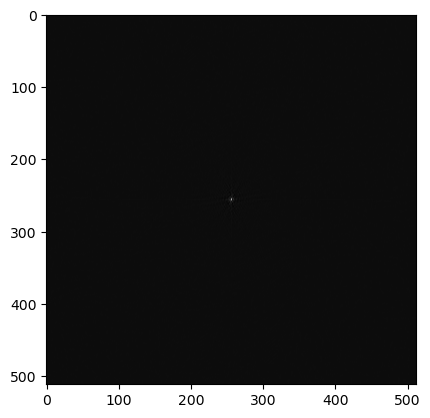

In [49]:
plt.imshow(np.real(fftshift(ifft2(h_hat))), cmap='gray')

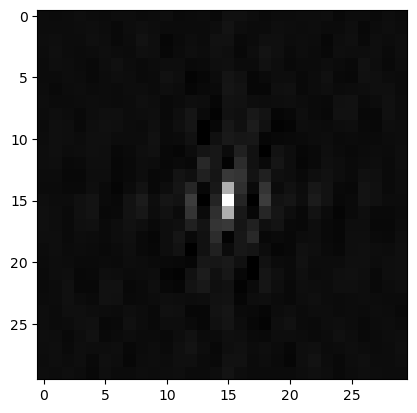

In [50]:
plt.imshow(np.real(fftshift(ifft2(h_hat)))[241:271, 241:271], cmap='gray')

In [51]:
denoised = np.real(ifft2(h_hat*fft2(noisy_img)))

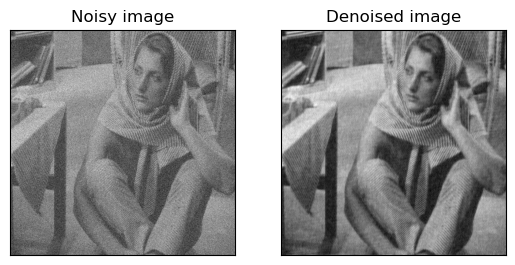

In [52]:
plt.subplot(1,2,1)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(denoised , cmap='gray')
plt.title('Denoised image')
plt.xticks([])
plt.yticks([])
plt.show()


In [103]:
FACTOR = 0.4

In [104]:
music = read('music.wav')[1]

In [105]:
music_1 = music + FACTOR*noise1
music_2 = music + FACTOR*noise2
music_3 = music + FACTOR*noise3

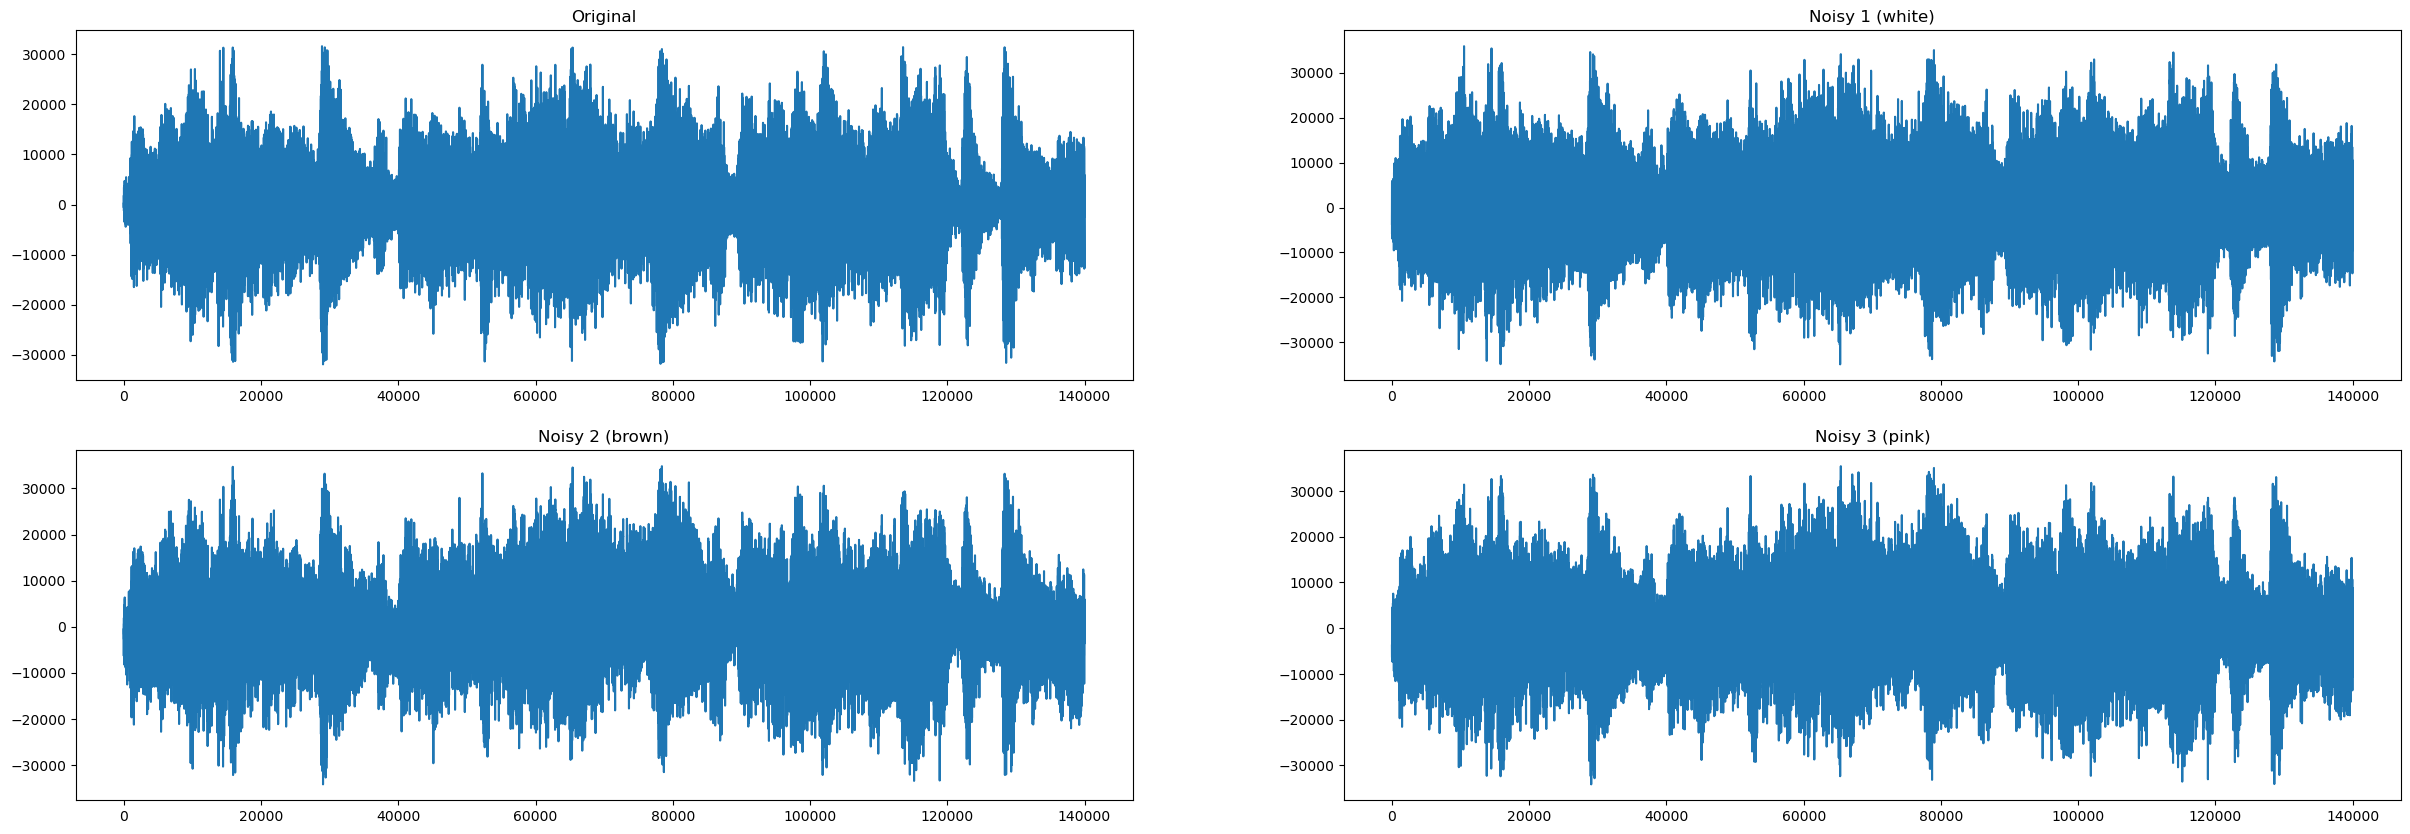

In [106]:
plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.plot(music)
plt.title('Original')

plt.subplot(2,2,2)
plt.plot(music_1)
plt.title('Noisy 1 (white)')

plt.subplot(2,2,3)
plt.plot(music_2)
plt.title('Noisy 2 (brown)')

plt.subplot(2,2,4)
plt.plot(music_3)
plt.title('Noisy 3 (pink)')

plt.show()

In [107]:
og_power = np.abs(fft(music))**2
noise1_power = FACTOR**2*np.abs(fft(noise1))**2
noise2_power = FACTOR**2*np.abs(fft(noise2))**2
noise3_power = FACTOR**2*np.abs(fft(noise3))**2

In [108]:
filter_1 = og_power / (og_power + noise1_power)
filter_2 = og_power / (og_power + noise2_power)
filter_3 = og_power / (og_power + noise3_power)

In [109]:
denoised_1 = np.real(ifft(filter_1*fft(music_1)))
denoised_2 = np.real(ifft(filter_2*fft(music_2)))
denoised_3 = np.real(ifft(filter_3*fft(music_3)))

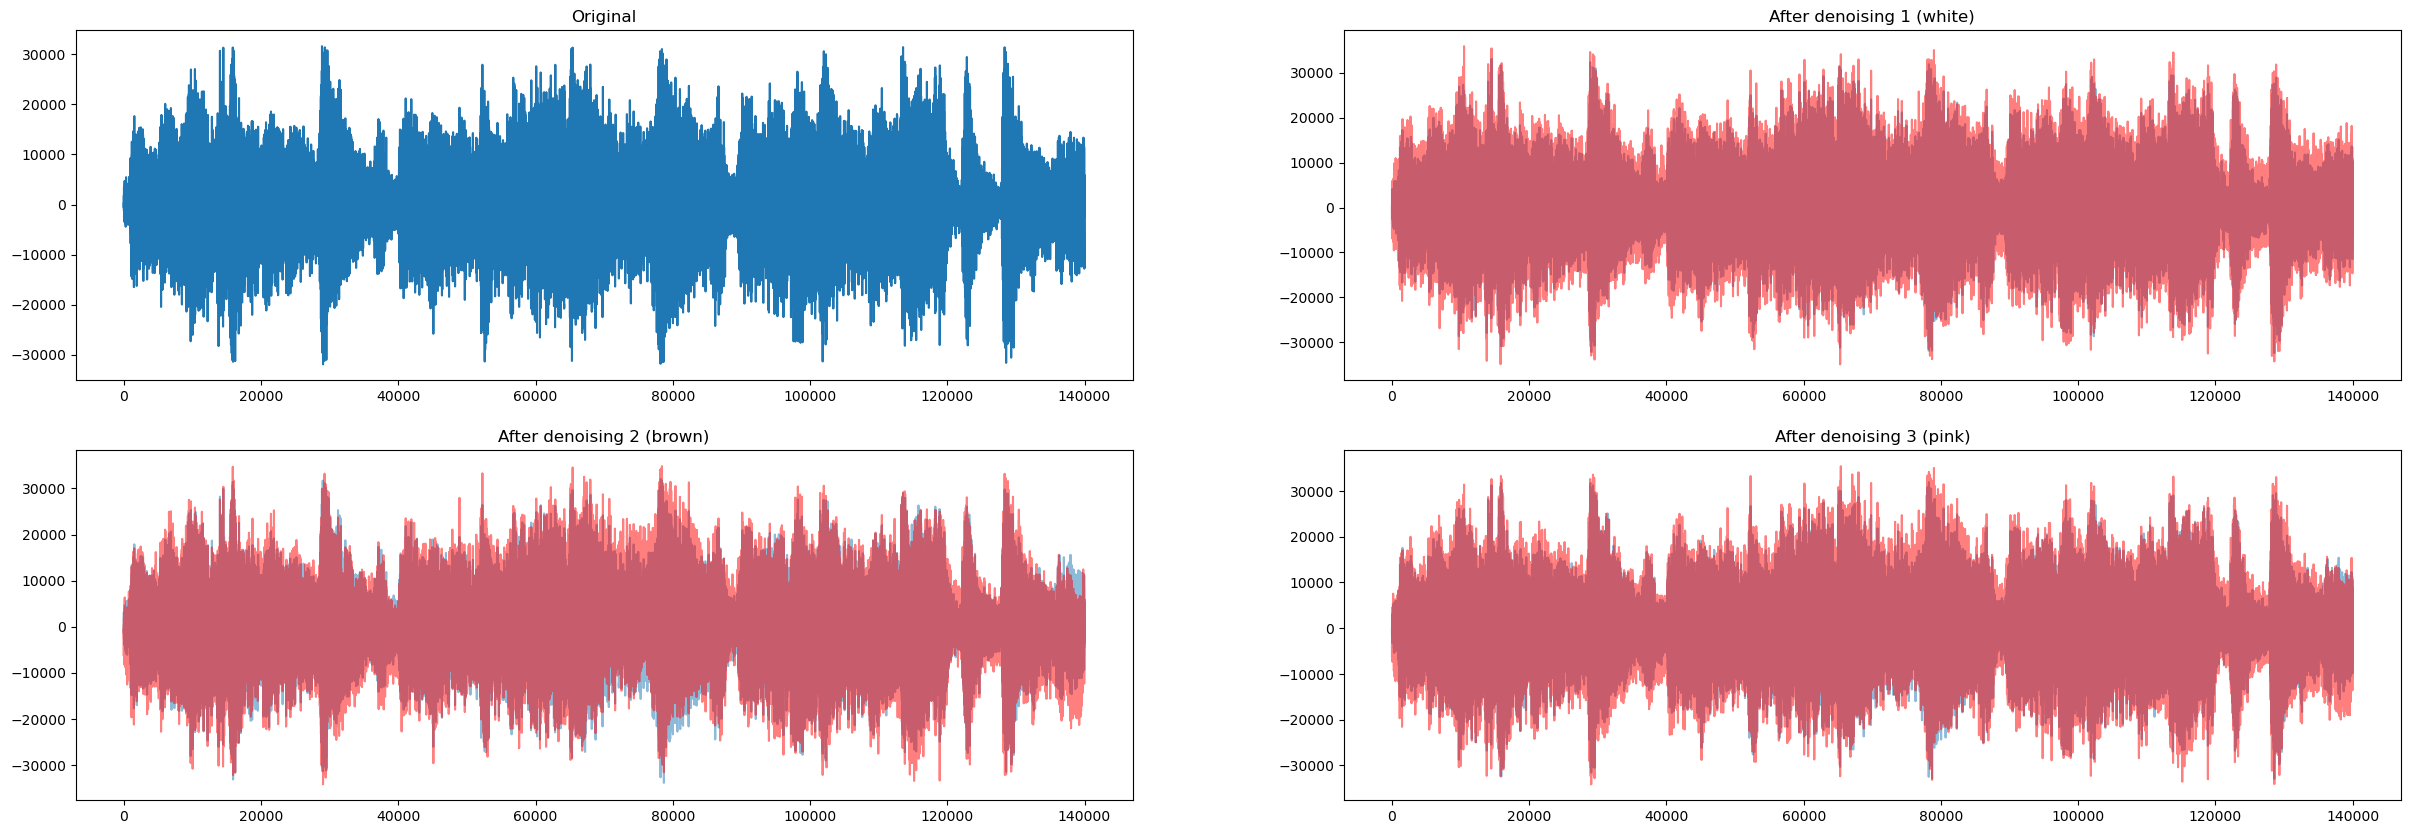

In [110]:
plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.plot(music)
plt.title('Original')

plt.subplot(2,2,2)
plt.plot(denoised_1, alpha=0.5)
plt.plot(music_1, alpha=0.5, color='red')
plt.title('After denoising 1 (white)')

plt.subplot(2,2,3)
plt.plot(denoised_2, alpha=0.5)
plt.plot(music_2, alpha=0.5, color='red')
plt.title('After denoising 2 (brown)')

plt.subplot(2,2,4)
plt.plot(denoised_3, alpha=0.5)
plt.plot(music_3, alpha=0.5, color='red')
plt.title('After denoising 3 (pink)')

plt.show()